In [7]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('../datasets/Social_Network_Ads.csv')
df = df.sample(frac=1)
# Calculate the percentage of null values in the specified column


In [8]:
xData, yData  = df[["Age", "EstimatedSalary"]], df["Purchased"] 


Точність моделі з тренувальним сетом: 63.4375%

Чутливість моделі з тренувальним сетом:: 0.0%

Специфічність моделі з тренувальним сетом:: 0.0%


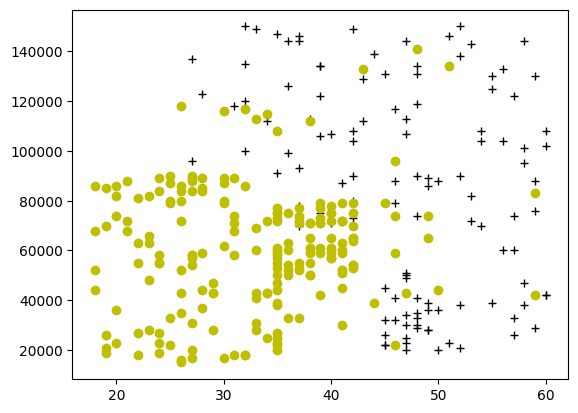

In [9]:

l = len(xData)
test_x = np.array(xData.iloc[:round(0.2*l)])
train_x = np.array(xData.iloc[round(0.2*l):])

l = len(yData)
test_y = np.array(yData.iloc[:round(0.2*l)])
train_y = np.array(yData.iloc[round(0.2*l):])
model = LogisticRegression()


plt.plot(train_x[train_y == 1, 0], train_x[train_y == 1, 1], 'k+', label="Прийнятий")
plt.plot(train_x[train_y == 0, 0], train_x[train_y == 0, 1], 'yo', label="Не прийнятий")

model.fit(train_x, train_y)

print('Точність моделі з тренувальним сетом: ' + str(model.score(train_x, train_y)*100) + 
'%\n')
print('Чутливість моделі з тренувальним сетом:: ' + str(metrics.recall_score(train_y, model.predict(train_x))*100) + '%\n')
print('Специфічність моделі з тренувальним сетом:: '+ str(metrics.precision_score(train_y, model.predict(train_x))*100) + '%')

In [10]:
print('Точність моделі з тестовим сетом: ' + str(model.score(test_x, test_y)*100) + 
'%\n')
print('Чутливість моделі з тестовим сетом: ' + str(metrics.recall_score(test_y, model.predict(test_x))))
print('Специфічність моделі з тестовим сетом: '+ str(metrics.precision_score(test_y, model.predict(test_x))*100) + '%')

Точність моделі з тестовим сетом: 67.5%

Чутливість моделі з тестовим сетом: 0.0
Специфічність моделі з тестовим сетом: 0.0%


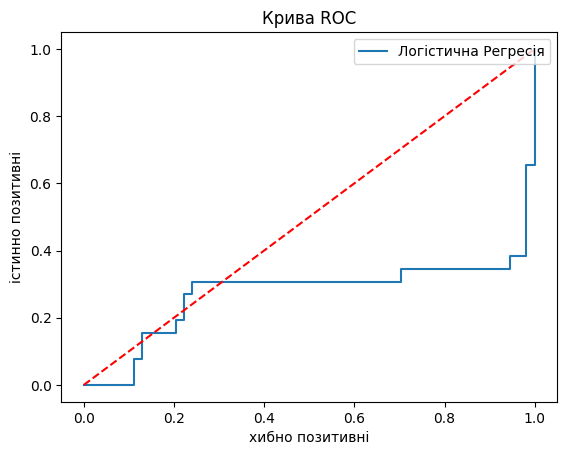

In [11]:
auc = metrics.roc_auc_score(test_y, model.predict(test_x))
fpr, tpr, thresholds = metrics.roc_curve(test_y, model.predict_proba(test_x)[:,1])
plt.plot(fpr, tpr, label = 'Логістична Регресія')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('хибно позитивні')
plt.ylabel('істинно позитивні')
plt.title('Крива ROC')
plt.legend(loc = 'upper right')
plt.show()